This Notebook is a summary of HuggingFace Course from this web https://huggingface.co/learn/nlp-course/chapter1/1?fw=tf

>[Setup](#updateTitle=true&folderId=1vIw0hBj5EFFREdMim5XCsp0YpsXYMbY9&scrollTo=NxMSjRo8k5g6)

>[Pipeline](#updateTitle=true&folderId=1vIw0hBj5EFFREdMim5XCsp0YpsXYMbY9&scrollTo=_M0tyQljlLOX)

>>[1. Sentiment Analysis](#updateTitle=true&folderId=1vIw0hBj5EFFREdMim5XCsp0YpsXYMbY9&scrollTo=V5MYoWvVlm76)

>>[2. Zero-shot classification](#updateTitle=true&folderId=1vIw0hBj5EFFREdMim5XCsp0YpsXYMbY9&scrollTo=Bh_YmbmSlwTV)

>>[3. Text Generation](#updateTitle=true&folderId=1vIw0hBj5EFFREdMim5XCsp0YpsXYMbY9&scrollTo=QLnGphgvmSOK)

>>[4. Mask Filling](#updateTitle=true&folderId=1vIw0hBj5EFFREdMim5XCsp0YpsXYMbY9&scrollTo=z8Kwfb4BnV-5)

>>[5. Named Entity Recognition](#updateTitle=true&folderId=1vIw0hBj5EFFREdMim5XCsp0YpsXYMbY9&scrollTo=jN2q1vEMn3sH)

>>[6. Question Answering](#updateTitle=true&folderId=1vIw0hBj5EFFREdMim5XCsp0YpsXYMbY9&scrollTo=658a1aFdoSQi)

>>[7. Summarization](#updateTitle=true&folderId=1vIw0hBj5EFFREdMim5XCsp0YpsXYMbY9&scrollTo=GIqmdgSLodqw)

>[How do Transformer Works](#updateTitle=true&folderId=1vIw0hBj5EFFREdMim5XCsp0YpsXYMbY9&scrollTo=Yv9UfzzK8kdS)

>>[Transformer History](#updateTitle=true&folderId=1vIw0hBj5EFFREdMim5XCsp0YpsXYMbY9&scrollTo=EYTOQU-b85N3)

>>[General Architecture](#updateTitle=true&folderId=1vIw0hBj5EFFREdMim5XCsp0YpsXYMbY9&scrollTo=ZvtbChm9-PSd)

>>[Attention Layer](#updateTitle=true&folderId=1vIw0hBj5EFFREdMim5XCsp0YpsXYMbY9&scrollTo=LWWwSq_D_GUH)

>>[Original Architecture](#updateTitle=true&folderId=1vIw0hBj5EFFREdMim5XCsp0YpsXYMbY9&scrollTo=lJ6snjWl_f-R)

>>[Architectures vs. checkpoints](#updateTitle=true&folderId=1vIw0hBj5EFFREdMim5XCsp0YpsXYMbY9&scrollTo=3slizkgv_8hm)



# **Setup**

In [1]:
!pip install transformers

In [2]:
!pip install transformers[sentencepiece]

In [3]:
!pip install sentencepiece

In [4]:
from transformers import pipeline

# **Pipeline**

The most basic object in the 🤗 Transformers library is the pipeline() function. It connects a model with its necessary preprocessing and postprocessing steps, allowing us to directly input any text and get an intelligible answer:

## **1. Sentiment Analysis**

In [5]:
classifier = pipeline("sentiment-analysis")
classifier(
    ["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!"]
)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9598048329353333},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

## **2. Zero-shot classification**   
 we need to classify texts that haven’t been labelled. This is a common scenario in real-world projects because annotating text is usually time-consuming and requires domain expertise. For this use case, the zero-shot-classification pipeline is very powerful: it allows you to specify which labels to use for the classification, so you don’t have to rely on the labels of the pretrained model. You’ve already seen how the model can classify a sentence as positive or negative using those two labels — but it can also classify the text using any other set of labels you like.

In [6]:
classifier = pipeline("zero-shot-classification")
classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445989489555359, 0.11197412759065628, 0.04342695698142052]}

This pipeline is called zero-shot because you don’t need to fine-tune the model on your data to use it. It can directly return probability scores for any list of labels you want!

## **3. Text Generation**  
The main idea here is that you provide a prompt and the model will auto-complete it by generating the remaining text. This is similar to the predictive text feature that is found on many phones. Text generation involves randomness, so it’s normal if you don’t get the same results as shown below.

In [7]:
generator = pipeline("text-generation", model="distilgpt2")
generator(
    "In this course, we will teach you how to",
    max_length=30, # total length of the output text
    num_return_sequences=2, #how many different sequences are generated
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to set up your own personal network. We would like you to contribute to the project too, because,'},
 {'generated_text': 'In this course, we will teach you how to build your own company and build your own portfolio in a way that will also help you to grow the'}]

## **4. Mask Filling**  
The idea of this task is to fill in the blanks in a given text:

In [8]:
unmasker = pipeline("fill-mask")
unmasker("This course will teach you all about <mask> models.", top_k=2)

No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.19619806110858917,
  'token': 30412,
  'token_str': ' mathematical',
  'sequence': 'This course will teach you all about mathematical models.'},
 {'score': 0.04052723944187164,
  'token': 38163,
  'token_str': ' computational',
  'sequence': 'This course will teach you all about computational models.'}]

The top_k argument controls how many possibilities you want to be displayed.   Note that here the model fills in the special <mask> word, which is often referred to as a mask token. Other mask-filling models might have different mask tokens, so it’s always good to verify the proper mask word when exploring other models.

## **5. Named Entity Recognition**  
Named entity recognition (NER) is a task where the model has to find which parts of the input text correspond to entities such as persons, locations, or organizations.

In [9]:
ner = pipeline("ner", grouped_entities=True)
ner("My name is Sylvain and I work at Hugging Face in Brooklyn.")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-p

[{'entity_group': 'PER',
  'score': 0.9981694,
  'word': 'Sylvain',
  'start': 11,
  'end': 18},
 {'entity_group': 'ORG',
  'score': 0.9796019,
  'word': 'Hugging Face',
  'start': 33,
  'end': 45},
 {'entity_group': 'LOC',
  'score': 0.9932106,
  'word': 'Brooklyn',
  'start': 49,
  'end': 57}]

We pass the option grouped_entities=True in the pipeline creation function to tell the pipeline to regroup together the parts of the sentence that correspond to the same entity: here the model correctly grouped “Hugging” and “Face” as a single organization, even though the name consists of multiple words. In fact, as we will see in the next chapter, the preprocessing even splits some words into smaller parts. For instance, Sylvain is split into four pieces: S, ##yl, ##va, and ##in. In the post-processing step, the pipeline successfully regrouped those pieces.

## **6. Question Answering**  
The question-answering pipeline answers questions using information from a given context:

In [10]:
question_answerer = pipeline("question-answering")
question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.6949767470359802, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}

Note that this pipeline works by extracting information from the provided context; it does not generate the answer.

## **7. Summarization**  
Summarization is the task of reducing a text into a shorter text while keeping all (or most) of the important aspects referenced in the text.

In [11]:
summarizer = pipeline("summarization")
summarizer(
    """
    America has changed dramatically during recent years. Not only has the number of
    graduates in traditional engineering disciplines such as mechanical, civil,
    electrical, chemical, and aeronautical engineering declined, but in most of
    the premier American universities engineering curricula now concentrate on
    and encourage largely the study of engineering science. As a result, there
    are declining offerings in engineering subjects dealing with infrastructure,
    the environment, and related issues, and greater concentration on high
    technology subjects, largely supporting increasingly complex scientific
    developments. While the latter is important, it should not be at the expense
    of more traditional engineering.

    Rapidly developing economies such as China and India, as well as other
    industrial countries in Europe and Asia, continue to encourage and advance
    the teaching of engineering. Both China and India, respectively, graduate
    six and eight times as many traditional engineers as does the United States.
    Other industrial countries at minimum maintain their output, while America
    suffers an increasingly serious decline in the number of engineering graduates
    and a lack of well-educated engineers.
"""
)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'summary_text': ' America has changed dramatically during recent years . The number of engineering graduates in the U.S. has declined in traditional engineering disciplines such as mechanical, civil,    electrical, chemical, and aeronautical engineering . Rapidly developing economies such as China and India continue to encourage and advance the teaching of engineering .'}]

Like with text generation, you can specify a max_length or a min_length for the result.

**8. Translation**  
For translation, you can use a default model if you provide a language pair in the task name (such as "translation_en_to_fr"), but the easiest way is to pick the model you want to use on the [Model Hub](https://huggingface.co/models). Here we’ll try translating from French to English:

In [12]:
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en")
translator("Ce cours est produit par Hugging Face.")

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


[{'translation_text': 'This course is produced by Hugging Face.'}]

# **How do Transformer Works**

## Transformer History


The Transformer architecture was introduced in June 2017. The focus of the original research was on translation tasks. This was followed by the introduction of several influential models, including:


1.   June 2018: GPT, the first pretrained Transformer model, used for fine-tuning on various NLP tasks and obtained state-of-the-art results
2.   October 2018: BERT, another large pretrained model, this one designed to produce better summaries of sentences (more on this in the next chapter!)
3. February 2019: GPT-2, an improved (and bigger) version of GPT that was not immediately publicly released due to ethical concerns
4. October 2019: DistilBERT, a distilled version of BERT that is 60% faster, 40% lighter in memory, and still retains 97% of BERT’s performance
5. October 2019: BART and T5, two large pretrained models using the same architecture as the original Transformer model (the first to do so)
6. May 2020, GPT-3, an even bigger version of GPT-2 that is able to perform well on a variety of tasks without the need for fine-tuning (called zero-shot learning)



This list is far from comprehensive, and is just meant to highlight a few of the different kinds of Transformer models. Broadly, they can be grouped into three categories:

1. GPT-like (also called auto-regressive Transformer models)  
2. BERT-like (also called auto-encoding Transformer models)  
3.  BART/T5-like (also called sequence-to-sequence Transformer models)


## General Architecture

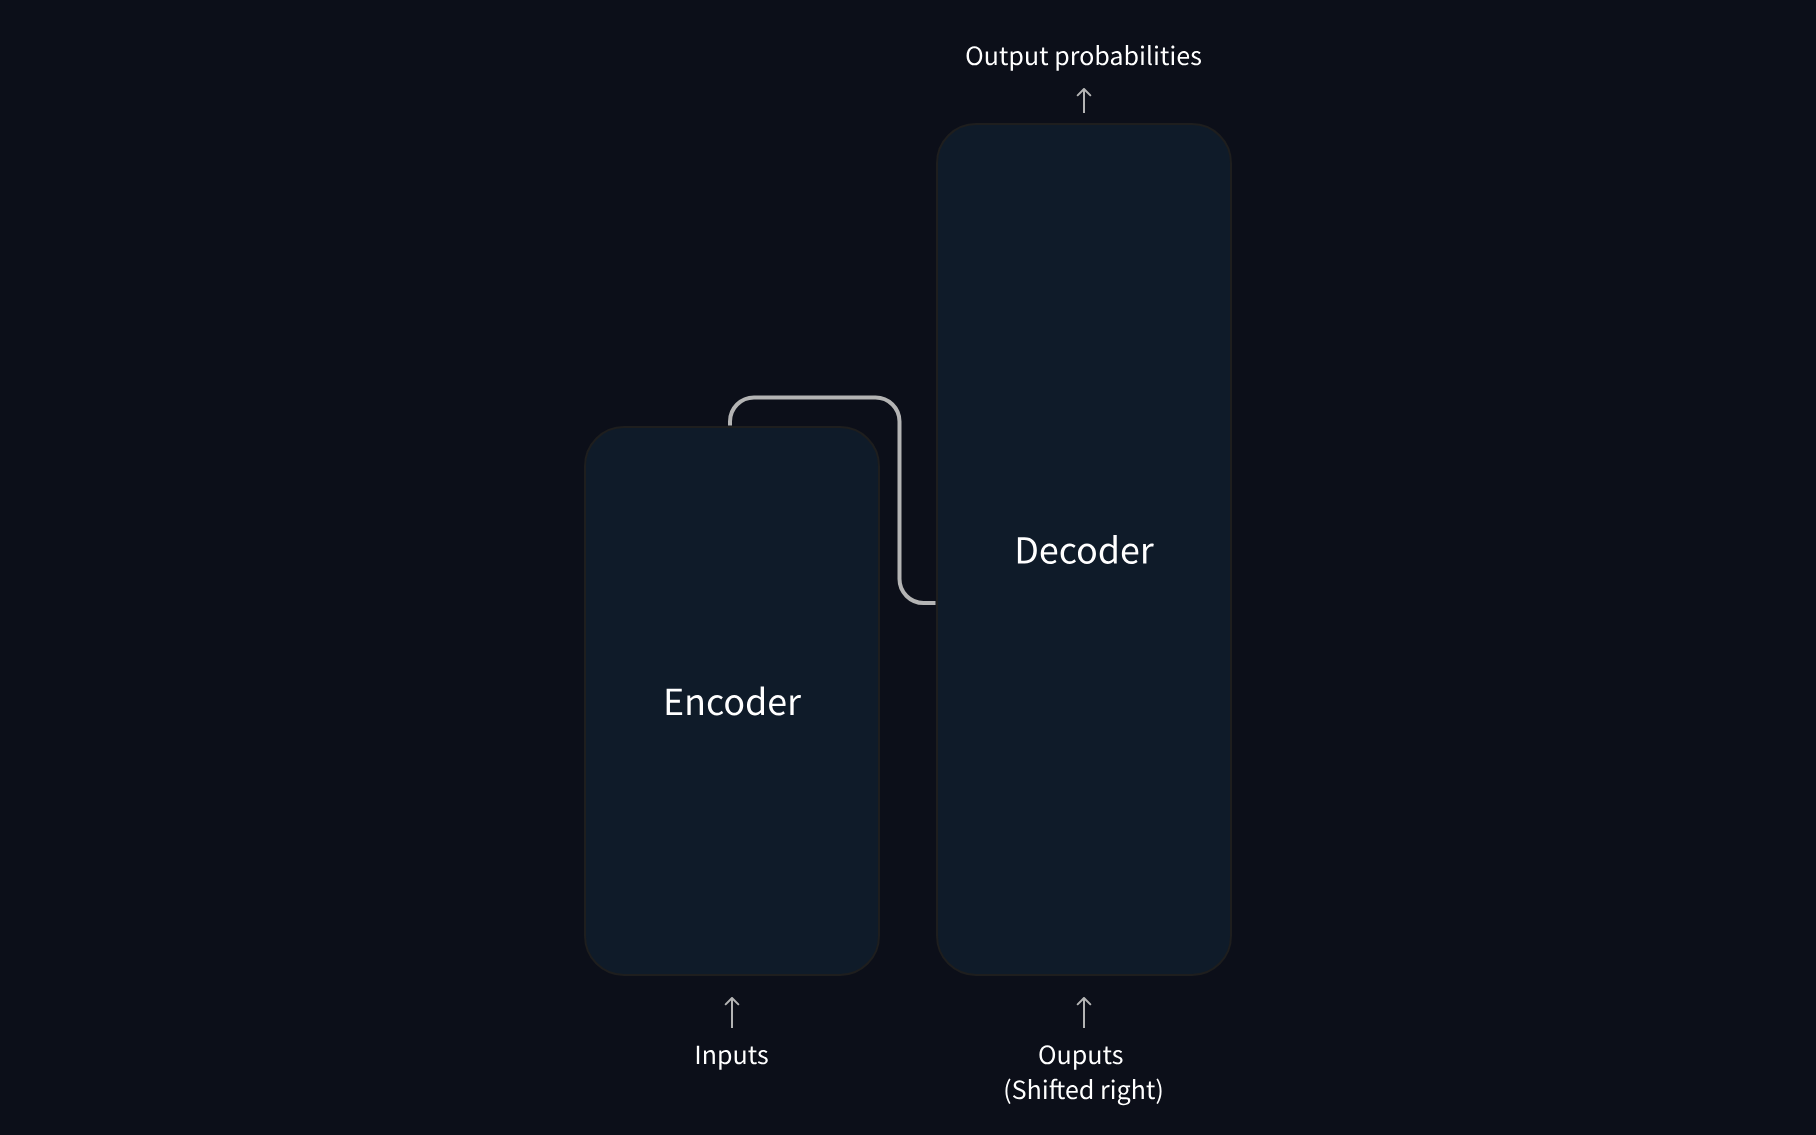

The model is primarily composed of two blocks:

*   Encoder (Left)   
    The encoder receives an input and builds a representation of it (its features). This means that the model is optimized to acquire understanding from the input.
*   Decoder (Right)
    The decoder uses the encoder’s representation (features) along with other inputs to generate a target sequence. This means that the model is optimized for generating outputs.






Each of these parts can be used independently, depending on the task:
1. Encoder-only models for Natural Language Understanding (NLU):  
Good for tasks that require understanding of the input, such as sentence classification and named entity recognition.
2. Decoder-only models for Natural Language Generation (NLG):  
Good for generative tasks such as text generation.
3. Encoder-decoder models or sequence-to-sequence models:   
Good for generative tasks that require an input, such as translation or summarization.

## Attention Layer

To put this into context, consider the task of translating text from English to French. Given the input “You like this course”, a translation model will need to also attend to the adjacent word “You” to get the proper translation for the word “like”, because in French the verb “like” is conjugated differently depending on the subject. The rest of the sentence, however, is not useful for the translation of that word. In the same vein, when translating “this” the model will also need to pay attention to the word “course”, because “this” translates differently depending on whether the associated noun is masculine or feminine. Again, the other words in the sentence will not matter for the translation of “this”. With more complex sentences (and more complex grammar rules), the model would need to pay special attention to words that might appear farther away in the sentence to properly translate each word.

The same concept applies to any task associated with natural language: a word by itself has a meaning, but that meaning is deeply affected by the context, which can be any other word (or words) before or after the word being studied.

## Original Architecture

The Transformer architecture was originally designed for translation. During training, the encoder receives inputs (sentences) in a certain language, while the decoder receives the same sentences in the desired target language. In the encoder, the attention layers can use all the words in a sentence (since, as we just saw, the translation of a given word can be dependent on what is after as well as before it in the sentence). The decoder, however, works sequentially and can only pay attention to the words in the sentence that it has already translated (so, only the words before the word currently being generated). For example, when we have predicted the first three words of the translated target, we give them to the decoder which then uses all the inputs of the encoder to try to predict the fourth word.

To speed things up during training (when the model has access to target sentences), the decoder is fed the whole target, but it is not allowed to use future words (if it had access to the word at position 2 when trying to predict the word at position 2, the problem would not be very hard!). For instance, when trying to predict the fourth word, the attention layer will only have access to the words in positions 1 to 3.

The original Transformer architecture looked like this, with the encoder on the left and the decoder on the right:

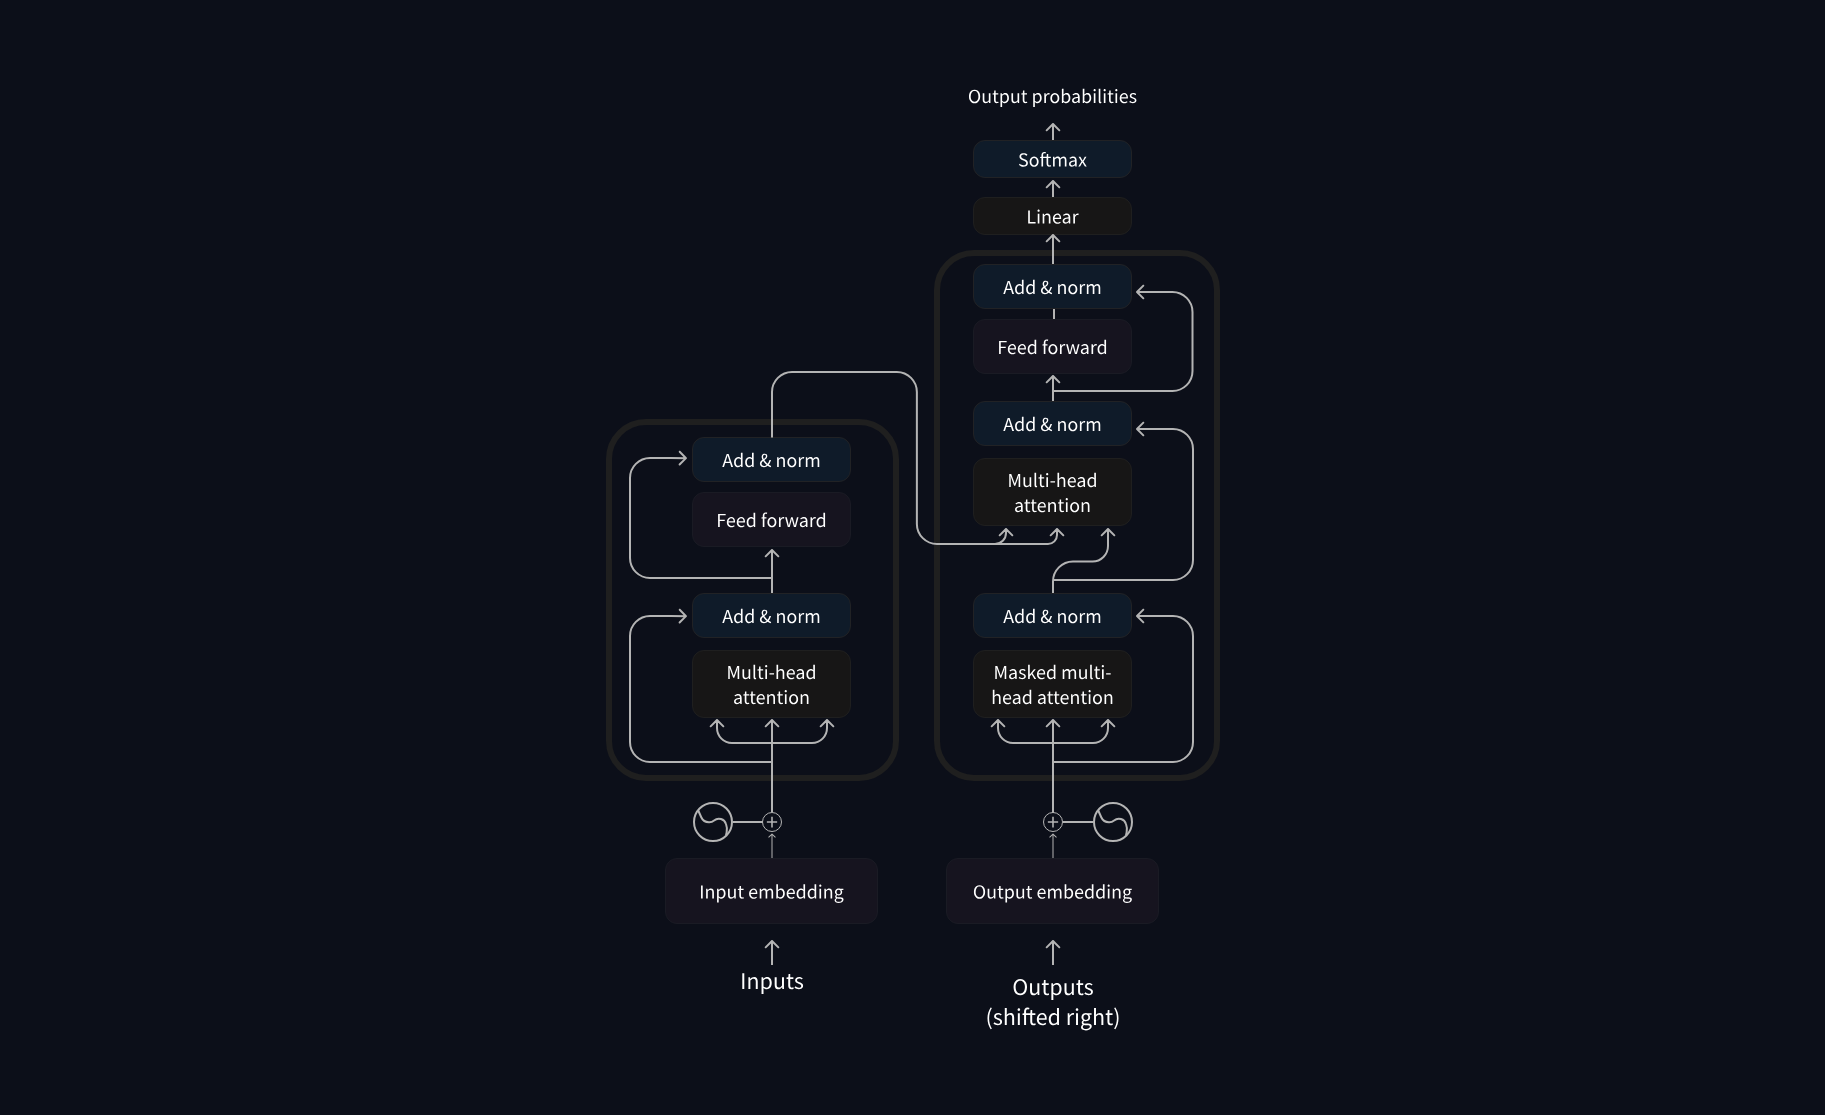

Note that the first attention layer in a decoder block pays attention to all (past) inputs to the decoder, but the second attention layer uses the output of the encoder. It can thus access the whole input sentence to best predict the current word. This is very useful as different languages can have grammatical rules that put the words in different orders, or some context provided later in the sentence may be helpful to determine the best translation of a given word.

The attention mask can also be used in the encoder/decoder to prevent the model from paying attention to some special words — for instance, the special padding word used to make all the inputs the same length when batching together sentences.

## Architectures vs Checkpoints


As we dive into Transformer models in this course, you’ll see mentions of architectures and checkpoints as well as models. These terms all have slightly different meanings:

* Architecture: This is the skeleton of the model — the definition of each layer and each operation that happens within the model.

* Checkpoints: These are the weights that will be loaded in a given architecture.  

* Model: This is an umbrella term that isn’t as precise as “architecture” or “checkpoint”: it can mean both. This course will specify architecture or checkpoint when it matters to reduce ambiguity.

For example, BERT is an architecture while bert-base-cased, a set of weights trained by the Google team for the first release of BERT, is a checkpoint. However, one can say “the BERT model” and “the bert-base-cased model.”